Analyzing config file revision_base_new_timers for bag 0__2023_05_11_18_35_54 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 36915.2,
    "post_opt_residual_compute_offline": 82.4718,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 8266.44,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 1566.356,
    "map_merge_obj_only_pgo_solve_pgo": 619.12,
    "map_merge_phase_one_gba_build_opt": 1249.262,
    "map_merge_obj_only_pgo_local_track_solve": 497.096,
    "map_merge_obj_only_pgo_local_track_build": 39.7372,
    "map_merge_global_bundle_adjustment": 98198.2,
    "optimizer_solve_opt": 326370.595,
    "optimizer_build_pgo": 50575.347700000006,
    "two_phase_opt_outlier_identification_offline": 112.4784,
    "phase_one_lba_build_opt": 15259.2973,
    "long_term_map_extraction": 251777.0,
    "obj_only_pgo_solve_pgo": 18196.563000000002,
    "visualization_top_level_online": 59137.991,
    "map_merge_phase_one_gba_solve_opt": 42574.2

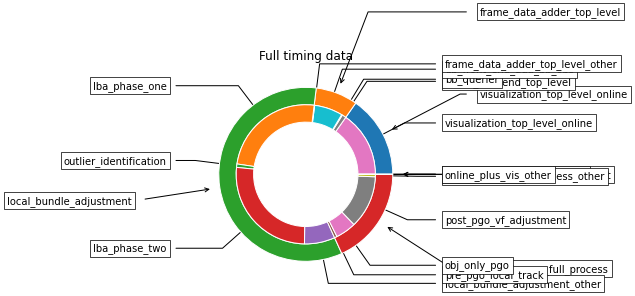

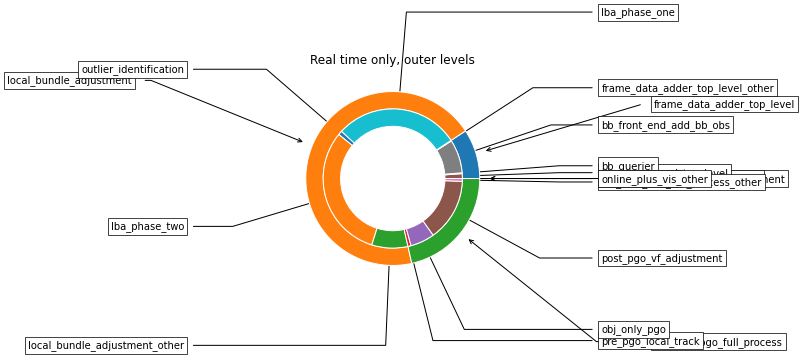

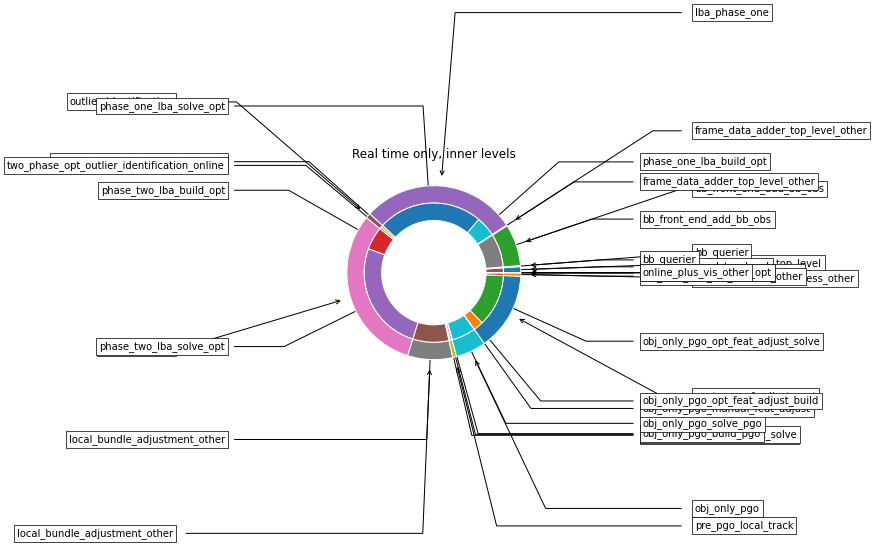

Analyzing config file revision_base_new_timers for bag 1__2023_05_13_19_03_07 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 424176.0,
    "post_opt_residual_compute_offline": 231.3999,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 13457.369999999999,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 4780.08,
    "map_merge_obj_only_pgo_solve_pgo": 9198.84,
    "map_merge_phase_one_gba_build_opt": 3794.9700000000003,
    "map_merge_obj_only_pgo_local_track_solve": 591.516,
    "map_merge_obj_only_pgo_local_track_build": 86.88749999999999,
    "map_merge_global_bundle_adjustment": 544467.0,
    "optimizer_solve_opt": 959446.656,
    "optimizer_build_pgo": 110268.6984,
    "two_phase_opt_outlier_identification_offline": 304.578,
    "phase_one_lba_build_opt": 25836.6784,
    "long_term_map_extraction": 81684.7,
    "obj_only_pgo_solve_pgo": 33374.6,
    "visualization_top_level_online": 84229.8704,
    "map_merge_phase_one_gba_solv

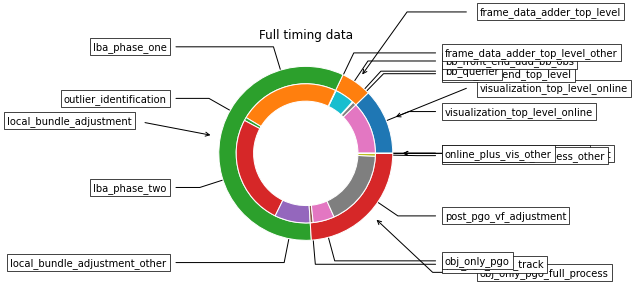

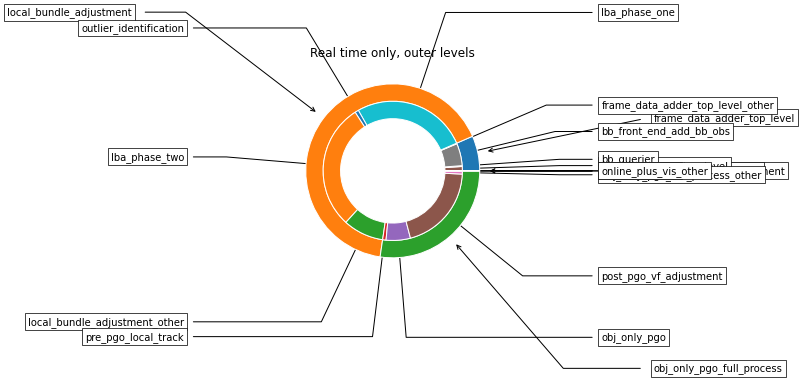

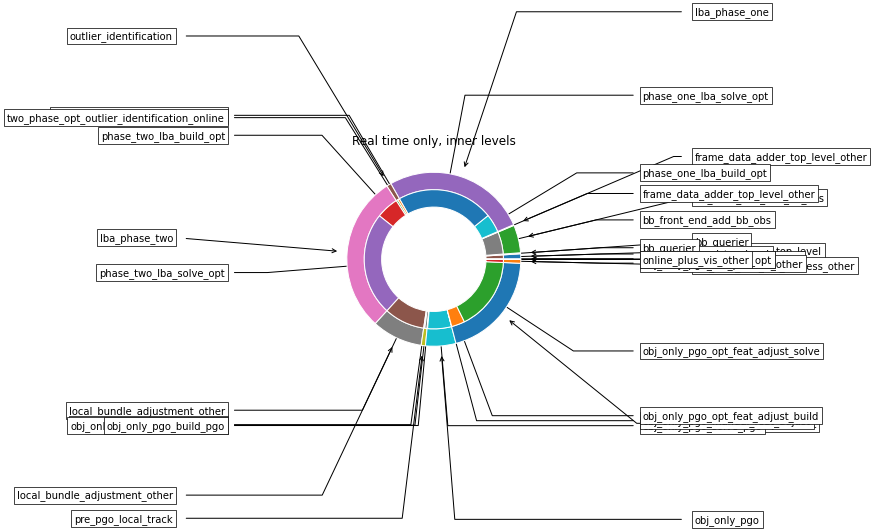

Analyzing config file revision_base_new_timers for bag 2__2023_05_13_21_51_39 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 74767.5,
    "post_opt_residual_compute_offline": 63.5384,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 5837.38,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 931.668,
    "map_merge_obj_only_pgo_solve_pgo": 1065.056,
    "map_merge_phase_one_gba_build_opt": 982.81,
    "map_merge_obj_only_pgo_local_track_solve": 559.37,
    "map_merge_obj_only_pgo_local_track_build": 29.3756,
    "map_merge_global_bundle_adjustment": 149140.0,
    "optimizer_solve_opt": 345684.57,
    "optimizer_build_pgo": 30936.5595,
    "two_phase_opt_outlier_identification_offline": 74.6444,
    "phase_one_lba_build_opt": 10963.329,
    "long_term_map_extraction": 25121.2,
    "obj_only_pgo_solve_pgo": 10486.314,
    "visualization_top_level_online": 49186.3372,
    "map_merge_phase_one_gba_solve_opt": 62646.2,
    "consecutive_po

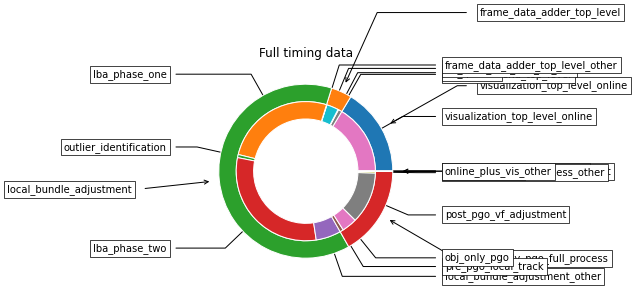

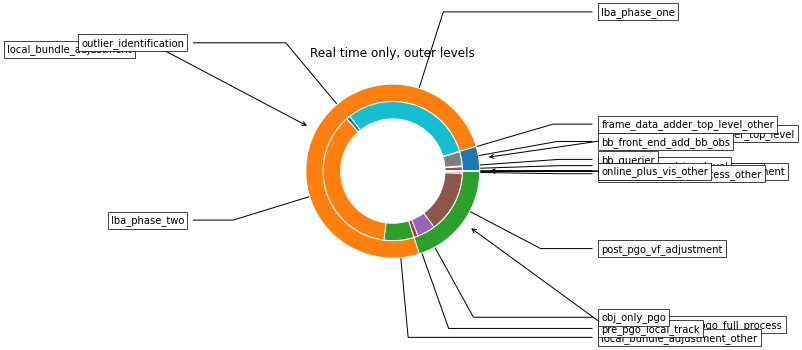

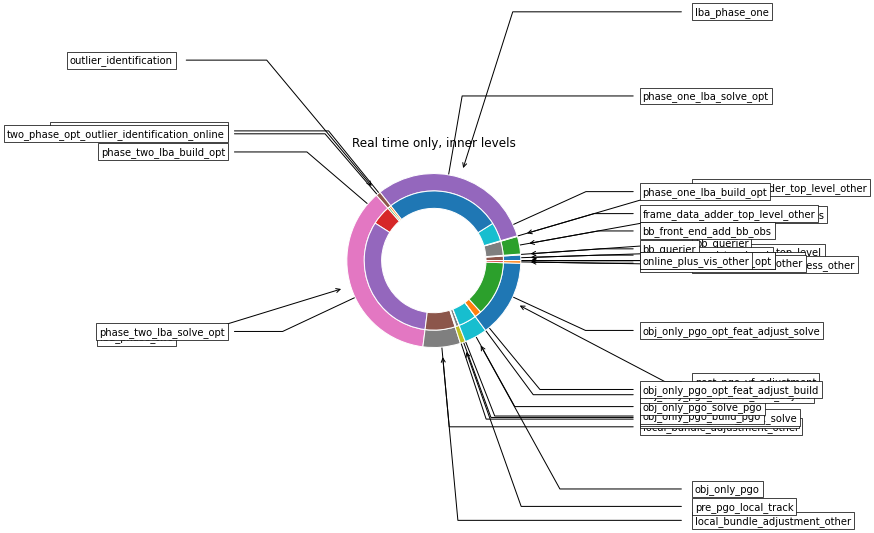

Analyzing config file revision_base_new_timers for bag 3__2023_05_16_15_02_33 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 201245.0,
    "post_opt_residual_compute_offline": 135.8739,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 11667.84,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 2595.549,
    "map_merge_obj_only_pgo_solve_pgo": 4422.8099999999995,
    "map_merge_phase_one_gba_build_opt": 2099.379,
    "map_merge_obj_only_pgo_local_track_solve": 319.332,
    "map_merge_obj_only_pgo_local_track_build": 65.0499,
    "map_merge_global_bundle_adjustment": 316095.0,
    "optimizer_solve_opt": 562768.8400000001,
    "optimizer_build_pgo": 59292.1196,
    "two_phase_opt_outlier_identification_offline": 177.1716,
    "phase_one_lba_build_opt": 15768.928,
    "long_term_map_extraction": 200637.0,
    "obj_only_pgo_solve_pgo": 22405.464,
    "visualization_top_level_online": 67686.22379999999,
    "map_merge_phase_one_gba_solve_

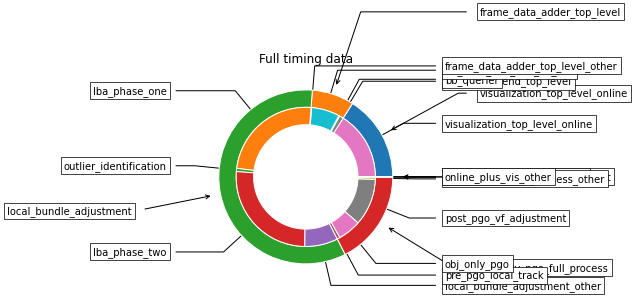

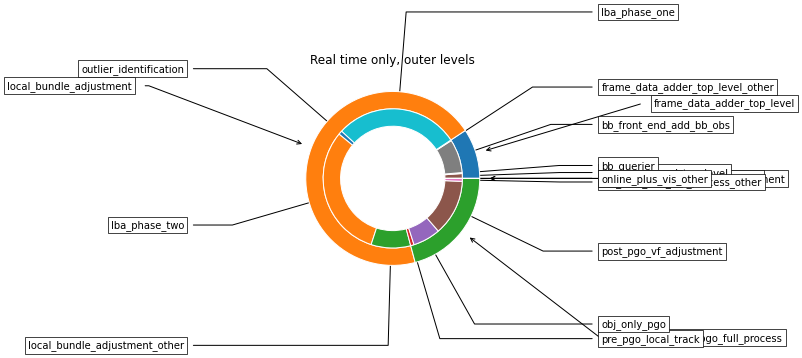

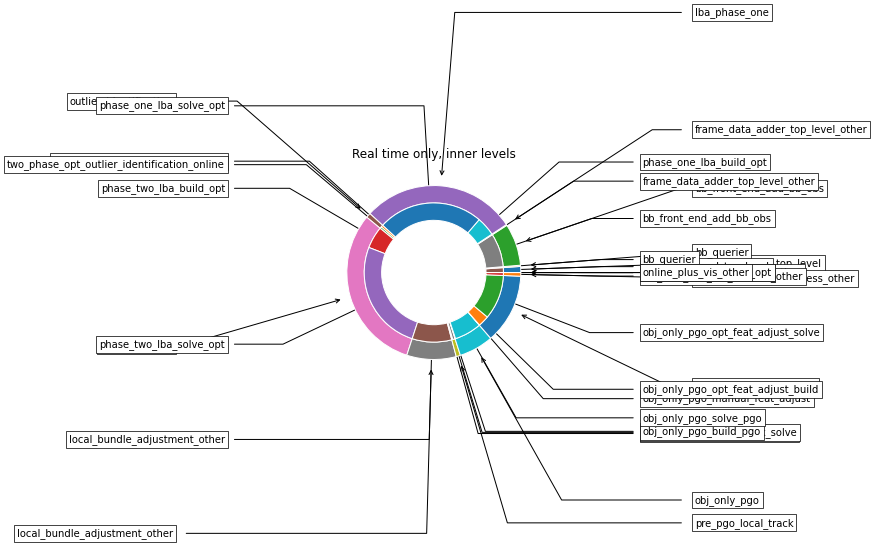

Analyzing config file revision_base_new_timers for bag 4__2023_06_23_10_22_43 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 231247.0,
    "post_opt_residual_compute_offline": 228.08819999999997,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 17123.19,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 4318.74,
    "map_merge_obj_only_pgo_solve_pgo": 5645.04,
    "map_merge_phase_one_gba_build_opt": 3373.9800000000005,
    "map_merge_obj_only_pgo_local_track_solve": 163.4829,
    "map_merge_obj_only_pgo_local_track_build": 81.9606,
    "map_merge_global_bundle_adjustment": 323931.0,
    "optimizer_solve_opt": 676952.196,
    "optimizer_build_pgo": 109500.8301,
    "two_phase_opt_outlier_identification_offline": 299.1822,
    "phase_one_lba_build_opt": 25167.669299999998,
    "long_term_map_extraction": 2045190.0,
    "obj_only_pgo_solve_pgo": 27025.124,
    "visualization_top_level_online": 85585.1406,
    "map_merge_phase_one_gba_

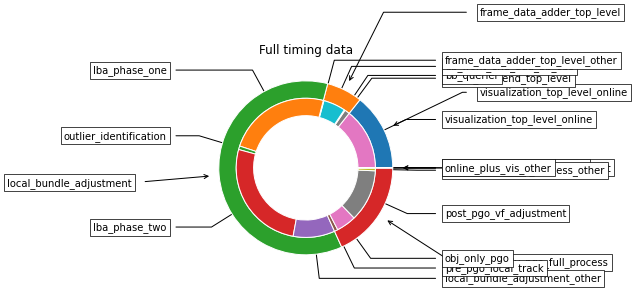

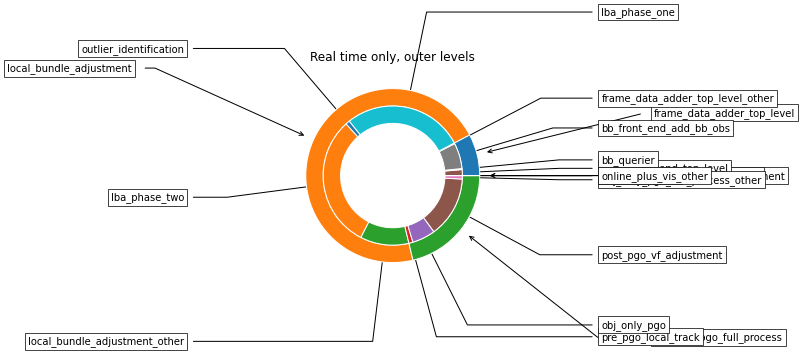

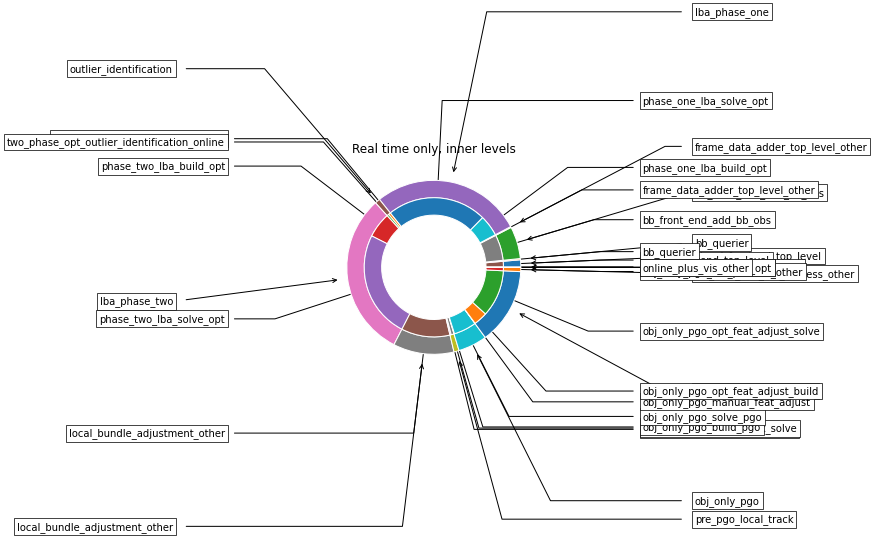

Analyzing config file revision_base_new_timers for bag 5__2023_06_22_21_51_46 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 95375.1,
    "post_opt_residual_compute_offline": 78.7834,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 5707.22,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 1324.17,
    "map_merge_obj_only_pgo_solve_pgo": 2001.52,
    "map_merge_phase_one_gba_build_opt": 1059.042,
    "map_merge_obj_only_pgo_local_track_solve": 347.508,
    "map_merge_obj_only_pgo_local_track_build": 28.6248,
    "map_merge_global_bundle_adjustment": 218520.0,
    "optimizer_solve_opt": 448391.493,
    "optimizer_build_pgo": 46008.012599999995,
    "two_phase_opt_outlier_identification_offline": 104.461,
    "phase_one_lba_build_opt": 14371.6972,
    "long_term_map_extraction": 738333.0,
    "obj_only_pgo_solve_pgo": 9893.280999999999,
    "visualization_top_level_online": 53575.48239999999,
    "map_merge_phase_one_gba_solve_opt": 

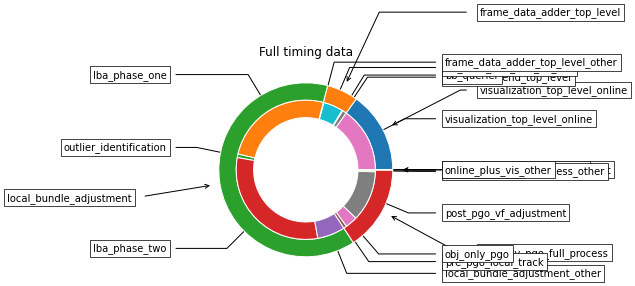

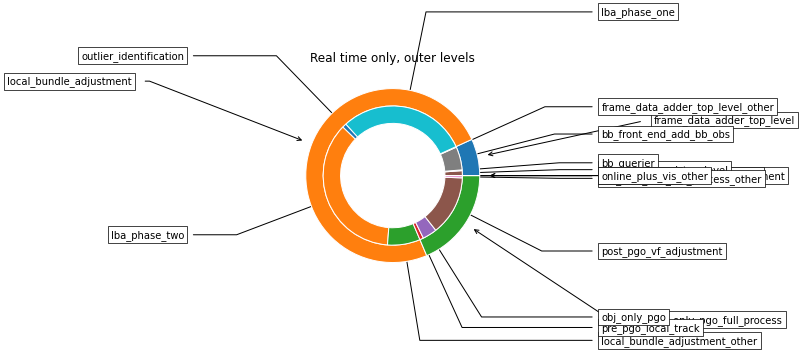

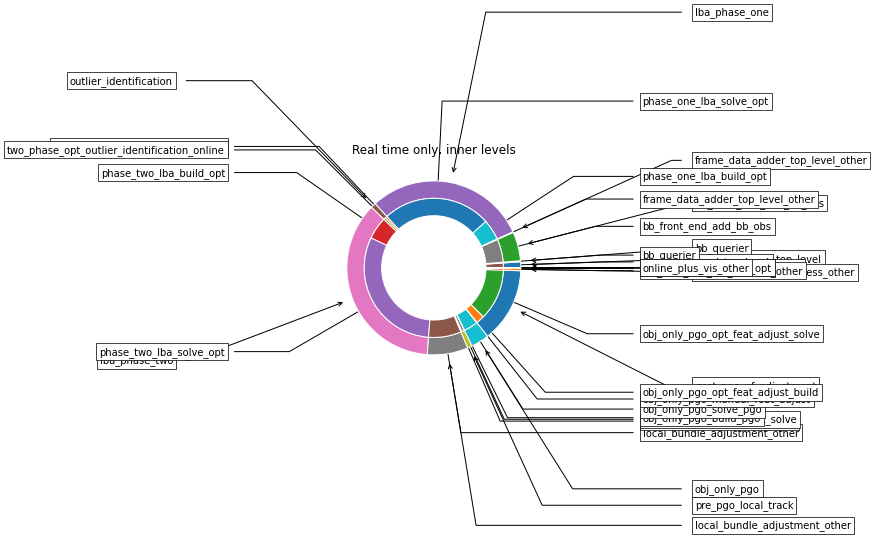

Analyzing config file revision_base_new_timers for bag 6__2023_06_28_11_02_23 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 136927.0,
    "post_opt_residual_compute_offline": 104.1078,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 35360.399999999994,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 1835.799,
    "map_merge_obj_only_pgo_solve_pgo": 3661.59,
    "map_merge_phase_one_gba_build_opt": 1542.3509999999999,
    "map_merge_obj_only_pgo_local_track_solve": 898.254,
    "map_merge_obj_only_pgo_local_track_build": 53.2038,
    "map_merge_global_bundle_adjustment": 157119.90000000002,
    "optimizer_solve_opt": 398815.74,
    "optimizer_build_pgo": 43709.305199999995,
    "two_phase_opt_outlier_identification_offline": 131.8785,
    "phase_one_lba_build_opt": 12783.173,
    "long_term_map_extraction": 101291.0,
    "obj_only_pgo_solve_pgo": 11802.545999999998,
    "visualization_top_level_online": 58350.0848,
    "map_merge

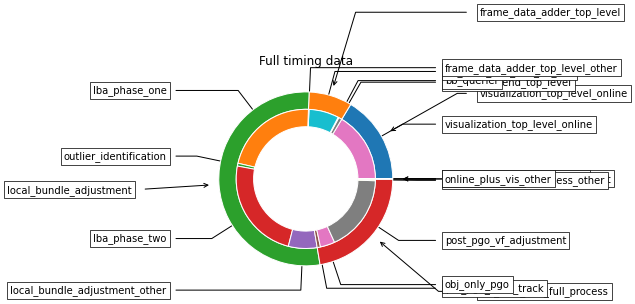

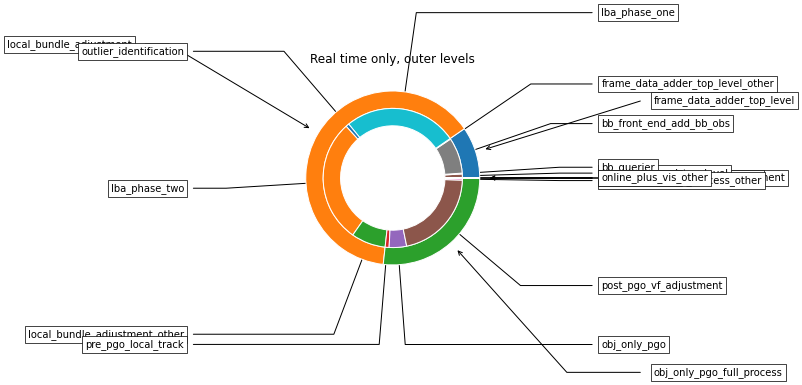

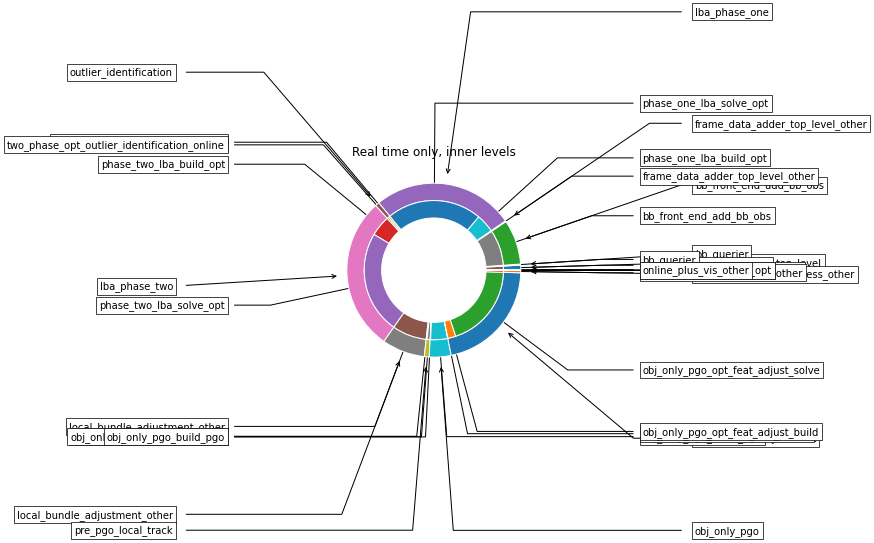

Analyzing config file revision_base_new_timers for bag 7__2023_06_27_21_52_02 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 289118.0,
    "post_opt_residual_compute_offline": 117.28559999999999,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 16498.11,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 2300.529,
    "map_merge_obj_only_pgo_solve_pgo": 2253.864,
    "map_merge_phase_one_gba_build_opt": 1910.685,
    "map_merge_obj_only_pgo_local_track_solve": 511.176,
    "map_merge_obj_only_pgo_local_track_build": 51.870599999999996,
    "map_merge_global_bundle_adjustment": 436053.0,
    "optimizer_solve_opt": 687147.995,
    "optimizer_build_pgo": 52838.59450000001,
    "two_phase_opt_outlier_identification_offline": 178.5324,
    "phase_one_lba_build_opt": 15282.672,
    "long_term_map_extraction": 38767.3,
    "obj_only_pgo_solve_pgo": 12142.229,
    "visualization_top_level_online": 64362.8372,
    "map_merge_phase_one_gba_sol

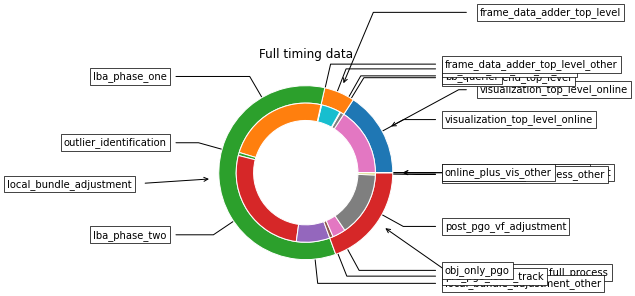

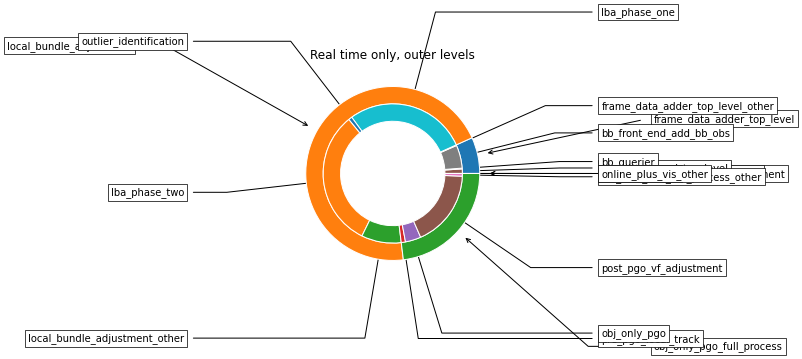

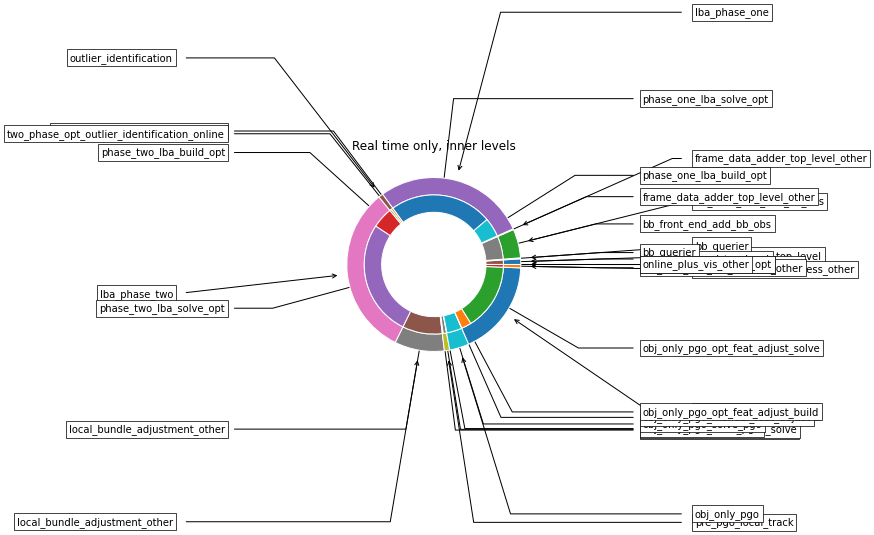

Analyzing config file revision_base_new_timers for bag 8__2023_06_21_10_32_23 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 431715.0,
    "post_opt_residual_compute_offline": 232.0556,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 21411.16,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 4623.2,
    "map_merge_obj_only_pgo_solve_pgo": 10054.8,
    "map_merge_phase_one_gba_build_opt": 3475.648,
    "map_merge_obj_only_pgo_local_track_solve": 322.2624,
    "map_merge_obj_only_pgo_local_track_build": 93.7904,
    "map_merge_global_bundle_adjustment": 626136.0,
    "optimizer_solve_opt": 965388.6810000001,
    "optimizer_build_pgo": 87283.0845,
    "two_phase_opt_outlier_identification_offline": 302.7584,
    "phase_one_lba_build_opt": 20548.5712,
    "long_term_map_extraction": 197840.0,
    "obj_only_pgo_solve_pgo": 31099.14,
    "visualization_top_level_online": 80478.702,
    "map_merge_phase_one_gba_solve_opt": 243848.4,
    

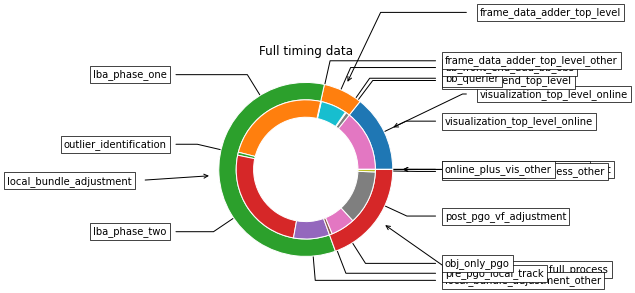

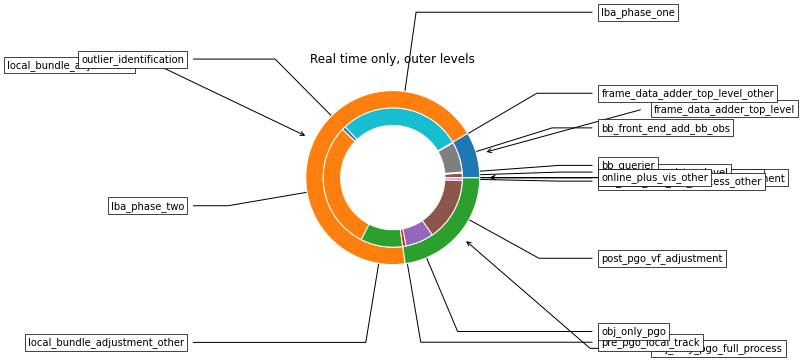

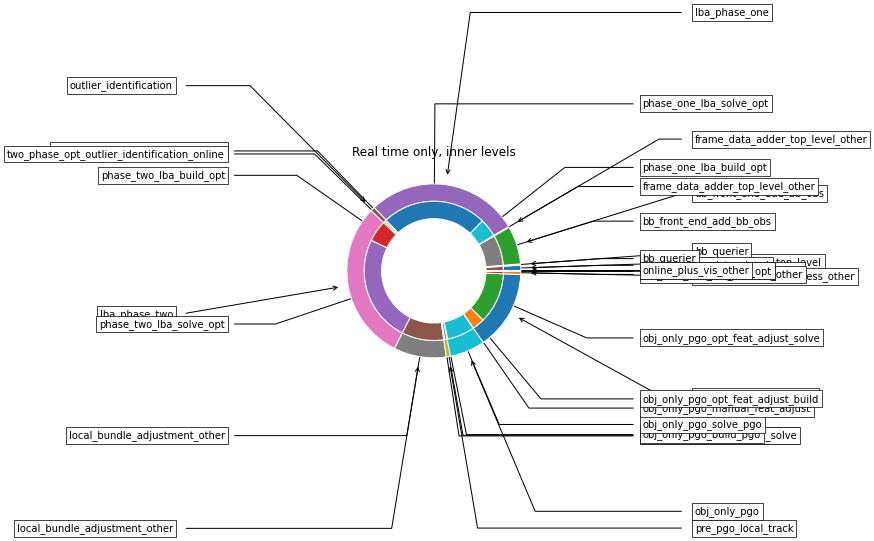

Analyzing config file revision_base_new_timers for bag 9__2023_06_27_21_36_30 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 664333.0,
    "post_opt_residual_compute_offline": 285.4484,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 18791.72,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 5537.6,
    "map_merge_obj_only_pgo_solve_pgo": 9114.08,
    "map_merge_phase_one_gba_build_opt": 4187.52,
    "map_merge_obj_only_pgo_local_track_solve": 521.912,
    "map_merge_obj_only_pgo_local_track_build": 114.1432,
    "map_merge_global_bundle_adjustment": 724720.0,
    "optimizer_solve_opt": 1125220.005,
    "optimizer_build_pgo": 112587.48899999999,
    "two_phase_opt_outlier_identification_offline": 378.52,
    "phase_one_lba_build_opt": 24628.6549,
    "long_term_map_extraction": 1451020.0,
    "obj_only_pgo_solve_pgo": 25389.558,
    "visualization_top_level_online": 80344.3919,
    "map_merge_phase_one_gba_solve_opt": 324980.0,
  

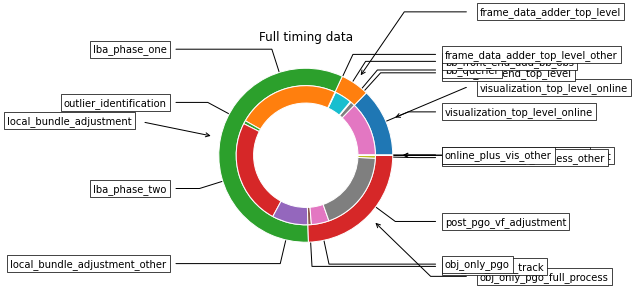

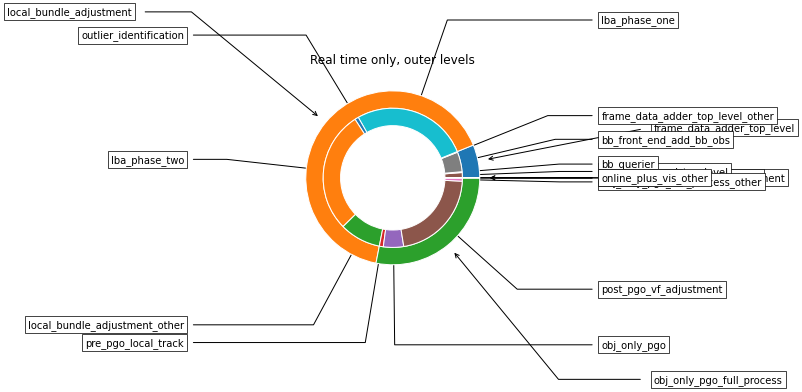

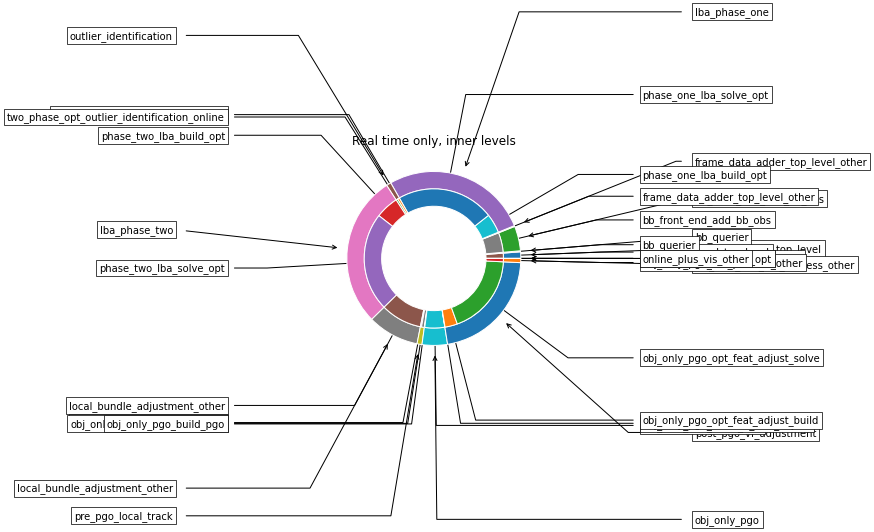

Analyzing config file revision_base_new_timers for bag 10__2023_05_17_12_13_10 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 579499.0,
    "post_opt_residual_compute_offline": 221.8863,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 39379.2,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 4253.04,
    "map_merge_obj_only_pgo_solve_pgo": 3278.07,
    "map_merge_phase_one_gba_build_opt": 3684.8999999999996,
    "map_merge_obj_only_pgo_local_track_solve": 743.628,
    "map_merge_obj_only_pgo_local_track_build": 80.16029999999999,
    "map_merge_global_bundle_adjustment": 699447.0,
    "optimizer_solve_opt": 1164982.2780000002,
    "optimizer_build_pgo": 105990.2774,
    "two_phase_opt_outlier_identification_offline": 267.5526,
    "phase_one_lba_build_opt": 24822.4375,
    "long_term_map_extraction": 3915620.0,
    "obj_only_pgo_solve_pgo": 12682.679999999998,
    "visualization_top_level_online": 88877.3604,
    "map_merge_phase_

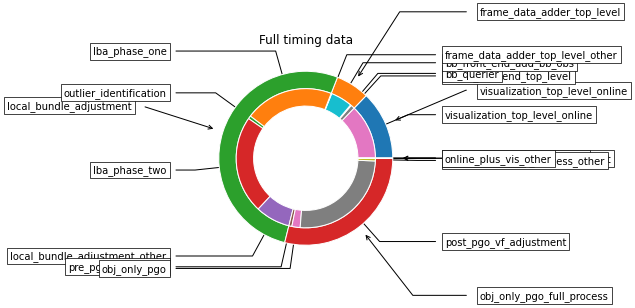

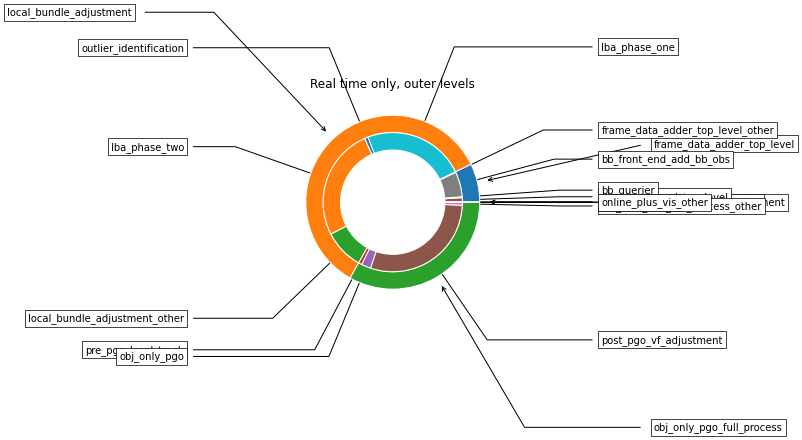

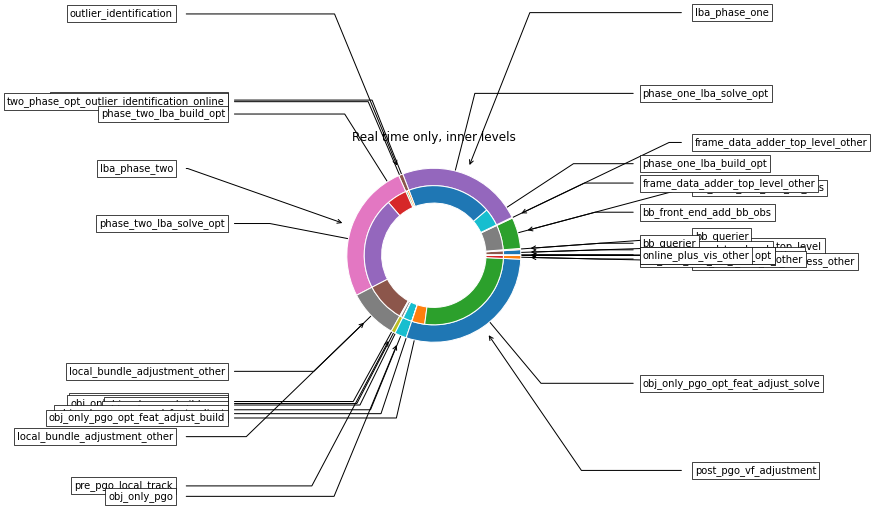

Analyzing config file revision_base_new_timers for bag 11__2023_05_12_13_15_27 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 101560.0,
    "post_opt_residual_compute_offline": 98.5322,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 6065.6,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 1925.148,
    "map_merge_obj_only_pgo_solve_pgo": 5135.82,
    "map_merge_phase_one_gba_build_opt": 1500.796,
    "map_merge_obj_only_pgo_local_track_solve": 537.526,
    "map_merge_obj_only_pgo_local_track_build": 39.5576,
    "map_merge_global_bundle_adjustment": 207322.0,
    "optimizer_solve_opt": 508798.52400000003,
    "optimizer_build_pgo": 61578.93,
    "two_phase_opt_outlier_identification_offline": 129.595,
    "phase_one_lba_build_opt": 18252.6858,
    "long_term_map_extraction": 72287.9,
    "obj_only_pgo_solve_pgo": 25361.18,
    "visualization_top_level_online": 68961.3645,
    "map_merge_phase_one_gba_solve_opt": 72312.2,
    "con

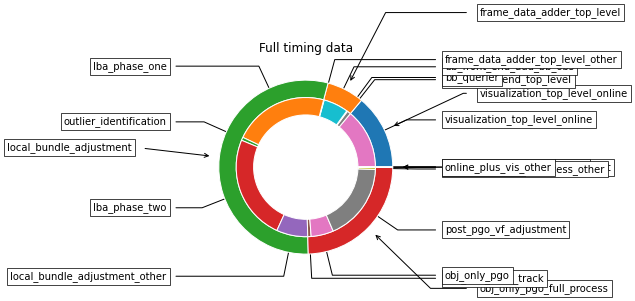

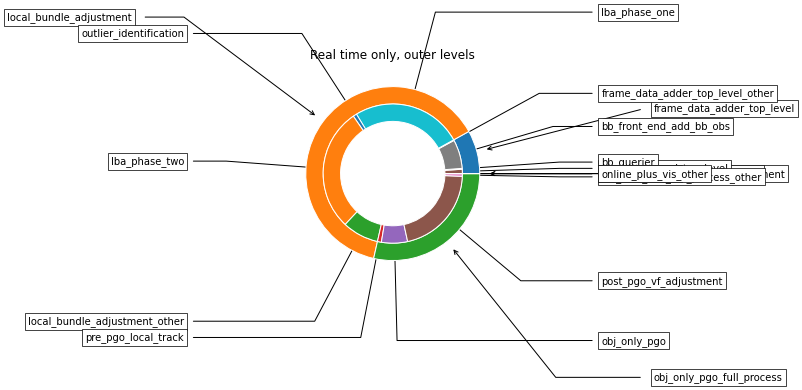

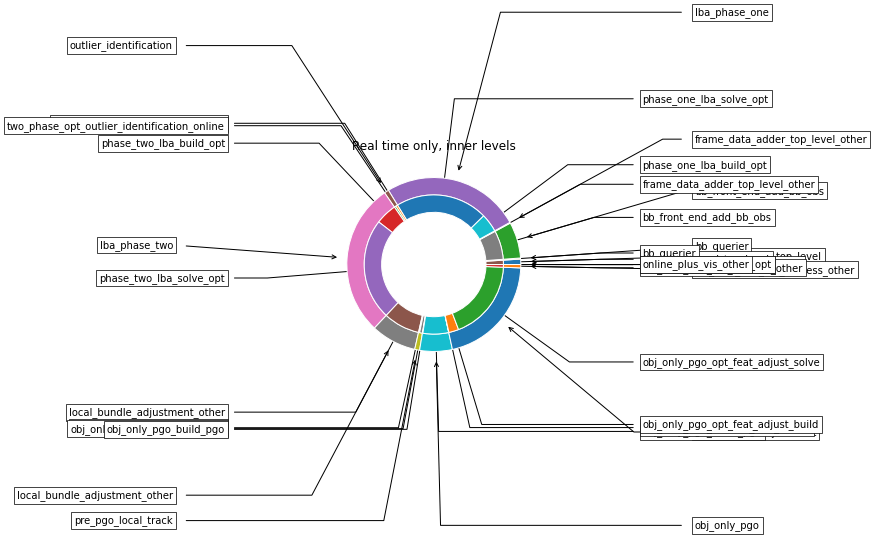

Analyzing config file revision_base_new_timers for bag 12__2023_06_30_11_27_42 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 620487.0,
    "post_opt_residual_compute_offline": 202.0725,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 6059.64,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 3717.8999999999996,
    "map_merge_obj_only_pgo_solve_pgo": 4914.87,
    "map_merge_phase_one_gba_build_opt": 2913.492,
    "map_merge_obj_only_pgo_local_track_solve": 242.22809999999998,
    "map_merge_obj_only_pgo_local_track_build": 72.3186,
    "map_merge_global_bundle_adjustment": 747978.0,
    "optimizer_solve_opt": 1066022.1700000002,
    "optimizer_build_pgo": 87709.8235,
    "two_phase_opt_outlier_identification_offline": 259.5792,
    "phase_one_lba_build_opt": 22962.107500000002,
    "long_term_map_extraction": 75982.6,
    "obj_only_pgo_solve_pgo": 32454.770000000004,
    "visualization_top_level_online": 83815.8516,
    "map_merge

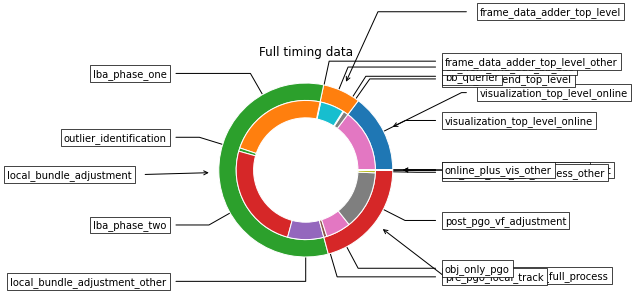

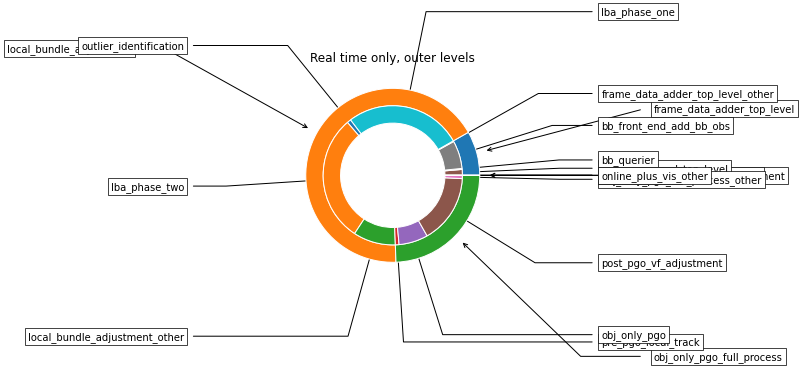

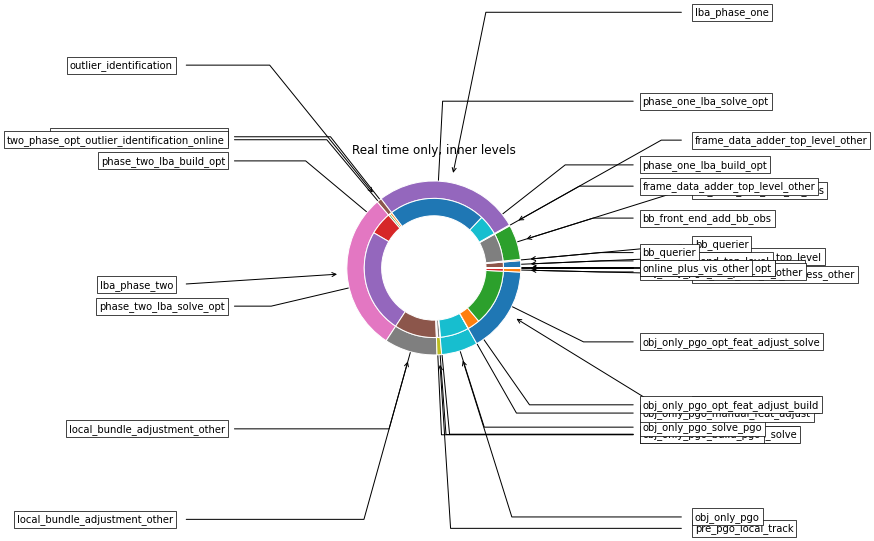

Analyzing config file revision_base_new_timers for bag 13__2023_05_12_10_50_32 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 228765.0,
    "post_opt_residual_compute_offline": 190.7088,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 59794.5,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 4121.61,
    "map_merge_obj_only_pgo_solve_pgo": 4767.2699999999995,
    "map_merge_phase_one_gba_build_opt": 2924.808,
    "map_merge_obj_only_pgo_local_track_solve": 615.429,
    "map_merge_obj_only_pgo_local_track_build": 68.3037,
    "map_merge_global_bundle_adjustment": 258479.40000000002,
    "optimizer_solve_opt": 669001.522,
    "optimizer_build_pgo": 93535.4157,
    "two_phase_opt_outlier_identification_offline": 243.8976,
    "phase_one_lba_build_opt": 23507.36,
    "long_term_map_extraction": 75210.3,
    "obj_only_pgo_solve_pgo": 35497.71,
    "visualization_top_level_online": 81020.3595,
    "map_merge_phase_one_gba_solve_opt": 12

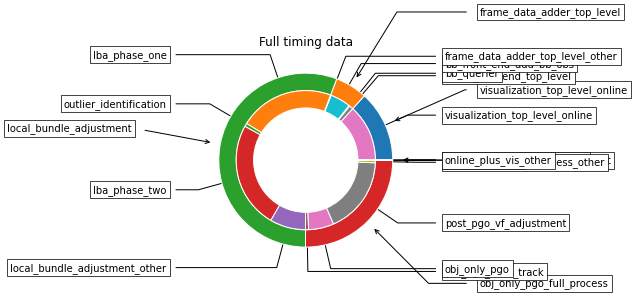

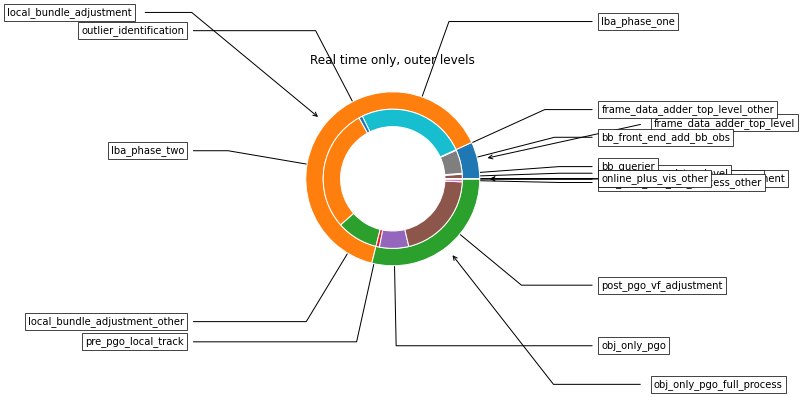

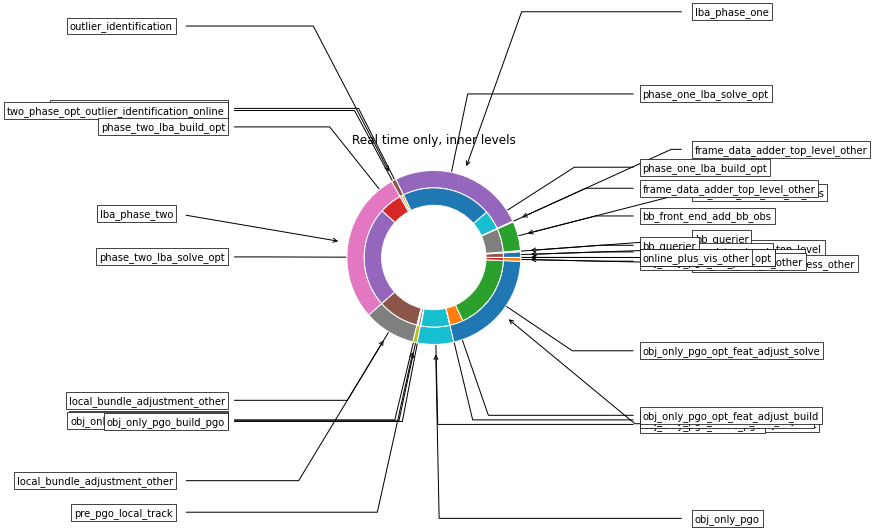

Analyzing config file revision_base_new_timers for bag 14__2023_06_22_22_12_29 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 131609.0,
    "post_opt_residual_compute_offline": 55.139,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 2088.12,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 985.764,
    "map_merge_obj_only_pgo_solve_pgo": 1393.064,
    "map_merge_phase_one_gba_build_opt": 733.382,
    "map_merge_obj_only_pgo_local_track_solve": 454.54,
    "map_merge_obj_only_pgo_local_track_build": 23.2768,
    "map_merge_global_bundle_adjustment": 273294.0,
    "optimizer_solve_opt": 419341.74700000003,
    "optimizer_build_pgo": 27730.9209,
    "two_phase_opt_outlier_identification_offline": 62.9288,
    "phase_one_lba_build_opt": 10003.109400000001,
    "long_term_map_extraction": 18454.1,
    "obj_only_pgo_solve_pgo": 5916.69,
    "visualization_top_level_online": 49668.1675,
    "map_merge_phase_one_gba_solve_opt": 137761.8,


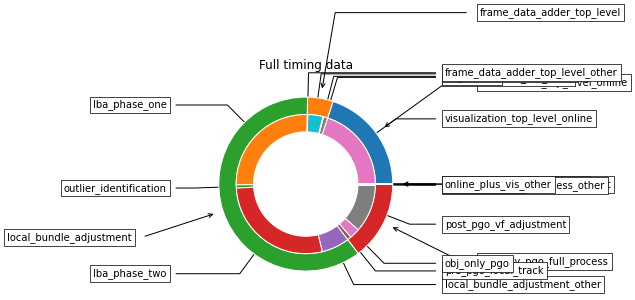

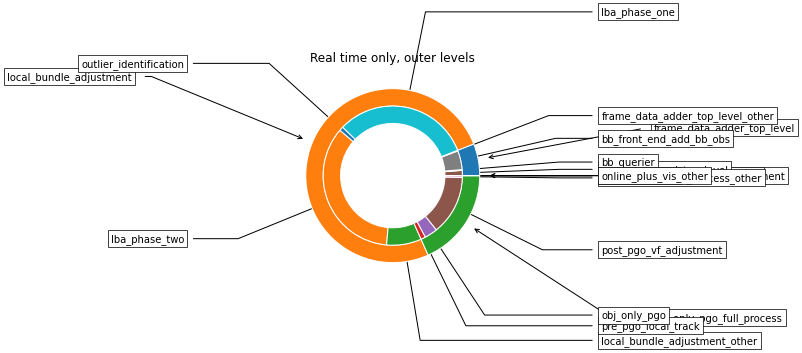

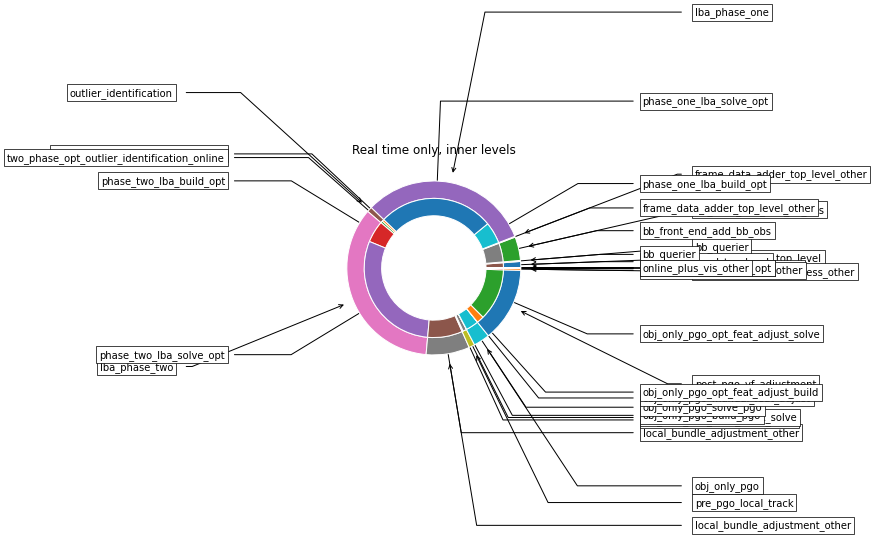

Analyzing config file revision_base_new_timers for bag 15__2023_06_26_11_08_53 --------------------------------
Cumulative time for each timer
{
    "post_session_map_merge": 83947.5,
    "post_opt_residual_compute_offline": 90.9504,
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 10730.02,
    "map_merge_obj_only_pgo_opt_feat_adjust_build": 1964.354,
    "map_merge_obj_only_pgo_solve_pgo": 2350.16,
    "map_merge_phase_one_gba_build_opt": 1457.536,
    "map_merge_obj_only_pgo_local_track_solve": 551.316,
    "map_merge_obj_only_pgo_local_track_build": 35.0944,
    "map_merge_global_bundle_adjustment": 183903.0,
    "optimizer_solve_opt": 423061.86,
    "optimizer_build_pgo": 59708.376500000006,
    "two_phase_opt_outlier_identification_offline": 128.072,
    "phase_one_lba_build_opt": 17473.3461,
    "long_term_map_extraction": 158205.0,
    "obj_only_pgo_solve_pgo": 13088.974999999999,
    "visualization_top_level_online": 73437.47039999999,
    "map_merge_phase_one_gba_solve_opt

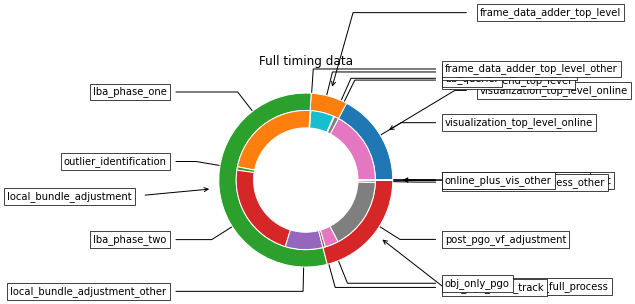

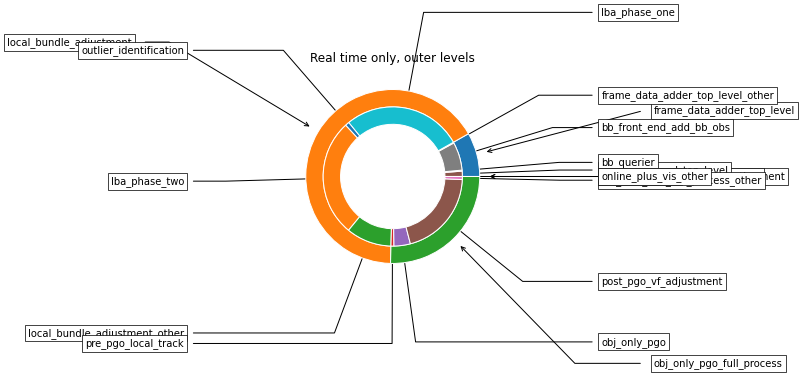

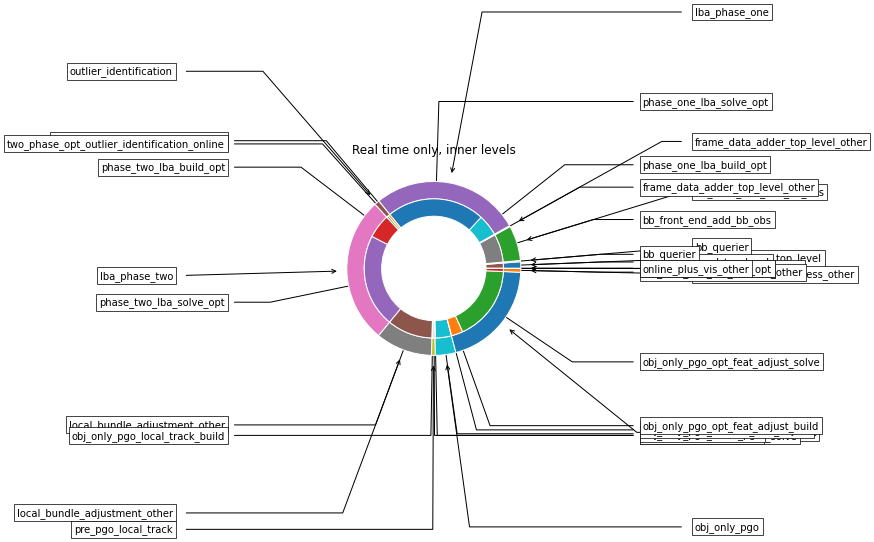

Total Data
Total Run time 110.46868941333332 min
Total Bag time 66.70166666666667 min
Too much multiplier? 1.656160856750206


In [14]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os.path

def getNameAvgTimeAndInvocationsFromFileLine(line_from_file):
    words = line_from_file.split()
    preceding_timer_name_word = "for"
    
    timerName = 0
    timerAvgTime = 0
    timerInvocations = 0
    
    words_after_for = 0
    found_for = False
    for indiv_word in words:
        if (found_for):
            words_after_for += 1
            if (words_after_for == 1):
                timerName = indiv_word
            elif (words_after_for == 7):
                timerAvgTime = float(indiv_word)
            elif (words_after_for == 11):
                timerInvocations = int(indiv_word)
        else:
            if indiv_word == preceding_timer_name_word:
                found_for = True
                
    return (timerName, timerAvgTime, timerInvocations)

def getTimerDataFromLogFile(log_file_name):
    query_string = "Run-time stats for"
    log_file_obj = open(log_file_name, 'r')
    
    timerInfo = []
    
    for file_line in log_file_obj.readlines():
        if (query_string in file_line):
            timerInfo.append(getNameAvgTimeAndInvocationsFromFileLine(file_line))
            
    return timerInfo

def getTotalTimeForTimerData(timerData):
    totalTimeData = {}
    for timerEntry in timerData:
        totalTime = timerEntry[1] * timerEntry[2]
        totalTimeData[timerEntry[0]] = totalTime
    return totalTimeData

def getTotalTimeForBag(bagId):
    bagTimesInMs = {
        "_2023_05_11_18_35_54" : 249820,
        "_2023_05_12_13_15_27" : 235590,
        "_2023_06_30_11_27_42" : 323560,
        "_2023_06_22_22_12_29" : 206420,
        "_2023_05_13_21_51_39" : 211270,
        "_2023_06_23_10_22_43" : 300150,
        "_2023_06_28_11_02_23" : 214010,
        "_2023_06_21_10_32_23" : 247510,
        "_2023_05_17_12_13_10" : 258590,
        "_2023_05_13_19_03_07" : 274400,
        "_2023_05_12_10_50_32" : 266070,
        "_2023_06_26_11_08_53" : 247540,
        "_2023_05_16_15_02_33" : 225500,
        "_2023_06_22_21_51_46" : 192140,
        "_2023_06_27_21_52_02" : 242220,
        "_2023_06_27_21_36_30" : 307310
    }
    
    return bagTimesInMs[bagId]



def createNestedValuesAndLabelsForRequestedTimers(totalTimeData, timerHierarchy):
    
#     if (not isinstance(timerHierarchy, dict)):
#         return (timerHierarchy, totalTimeData[timerHierarchy], totalTimeData[timerHierarchy], 1)
    
    
#     firstTime = True
            
#     labelsTree = {}
#     childValues = []
#     childrenSum = 0
#     totalTimeForNode = 0, 
#     maxDepth = 0
    
#     for timerNodeKey, timerNodeValue in timerHierarchy:
        
#         if (not firstTime):
#             print("Dictionaries should have only one entry (like JSON structure)")
        
#         firstTime = False
#         childLabels = []

#         for childNode in timerNodeValue:
#             childResults = createNestedValuesAndLabelsForRequestedTimers(totalTimeData, childNode)
#             childLabels.append(childResults(0))
#             childValues.append(childResults(1))
#             childrenSum += childResults(2)
#             maxDepth = max(maxDepth, childResults(3))
#         if (timerNodeKey in totalTimeData):
#             totalTimeForNode = totalTimeData[timerNodeKey]
#             otherTime = totalTimeForNode - childrenSum
#             otherLabel = timerNodeKey + "_other"
#             childLabels.append(otherLabel)
#         else:
#             totalTimeForNode = childrenSum
            
#         labelsTree = {timerNodeKey : childLabels}
        
        
#     return (labelsTree, childValues, totalTimeForNode, maxDepth + 1)

    if (not isinstance(timerHierarchy, dict)):
        return (timerHierarchy, totalTimeData.get(timerHierarchy, 0), None, None, 0)
    
    
    firstTime = True
    childValues = []
    childrenSum = 0
    totalTimeForNode = 0
    maxDepth = 0
    
    for timerNodeKey, timerNodeValue in timerHierarchy.items():
        
        if (not firstTime):
            print("Dictonaries should have only one entry")
            
        firstTime = False
        
        childrenChildrenLabels = []
        childrenChildrenValues = []
        
        processedChildrenLabels = []
        processedChildrenValues = []
        
        childrenMaxDepths = []
        
        childNodeData = []
        
        currChildrenLabels = []
        currChildrenValues = []

        
        
        for childNode in timerNodeValue:
#             print("Getting data for node")
#             print(childNode)
            childResults = createNestedValuesAndLabelsForRequestedTimers(totalTimeData, childNode)
#             print(childResults)
            childNodeData.append(childResults)

            childMaxDepth = childResults[4]
            childrenSum += childResults[1]

            maxDepth = max(maxDepth, childMaxDepth)
            childrenMaxDepths.append(childMaxDepth)
            
        childrensChildrensLabels = [[] for _ in range(maxDepth)]
        childrensChildrensValues = [[] for _ in range(maxDepth)]
            
#         print("Child node data")
#         print(childNodeData)
                        
        if (timerNodeKey in totalTimeData):
            otherLabel = timerNodeKey + "_other"
            totalTimeForNode = totalTimeData[timerNodeKey]
            otherTime = totalTimeForNode - childrenSum
            
            otherChildResults = (otherLabel, otherTime, None, None, 0)
            childNodeData.append(otherChildResults)
            
#             print("Child node data after adding other")
#             print(childNodeData)
        else:
            totalTimeForNode = childrenSum
                    
        for childNodeDataEntry in childNodeData:
#             print("Child node data entry")
#             print(childNodeDataEntry)
            currChildrenLabels.append(childNodeDataEntry[0])
            currChildrenValues.append(childNodeDataEntry[1])
#             print(currChildrenValues)
            
            childrenLabelsForCurrChildren = childNodeDataEntry[2]
            childrenValuesForCurrChildren = childNodeDataEntry[3]
            
            if (childrenLabelsForCurrChildren is None):
                childrenLabelsForCurrChildren = []
            if (childrenValuesForCurrChildren is None):
                childrenValuesForCurrChildren = []
            
            childMaxDepth = childNodeDataEntry[4]
            
            while (len(childrenLabelsForCurrChildren)  < maxDepth):
                if (len(childrenLabelsForCurrChildren) == 0):
                    childrenLabelsForCurrChildren = [[childNodeDataEntry[0]]]
                    childrenValuesForCurrChildren = [[childNodeDataEntry[1]]]
                else:
                    childrenLabelsForCurrChildren.append(childrenLabelsForCurrChildren[-1])                                 
                    childrenValuesForCurrChildren.append(childrenValuesForCurrChildren[-1])    

            for i in range(maxDepth):
                childrensChildrensLabels[i].extend(childrenLabelsForCurrChildren[i])
                childrensChildrensValues[i].extend(childrenValuesForCurrChildren[i])
                    
#             print("Extended labels/values list for child " + childNodeDataEntry[0])
#             print(childrenLabelsForCurrChildren)
#             print(childrenValuesForCurrChildren)

#             print("Updated childrens children list for " + timerNodeKey + " after adding " + childNodeDataEntry[0])
#             print(childrensChildrensLabels)
#             print(childrensChildrensValues)
                                                                        
        processedChildrenLabels = [currChildrenLabels]
        if (len(childrensChildrensLabels) != 0):
            processedChildrenLabels.extend(childrensChildrensLabels)
                    
        processedChildrenValues = [currChildrenValues]        
        if (len(childrensChildrensLabels) != 0):
            processedChildrenValues.extend(childrensChildrensValues)
            
#         print("Labels and values for children of " + timerNodeKey)
#         print(json.dumps(processedChildrenLabels, indent=4))
#         print(json.dumps(processedChildrenValues, indent=4))
        
        return (timerNodeKey, totalTimeForNode, processedChildrenLabels, processedChildrenValues, maxDepth+1)
            
    
def visualizeTimingForBagId(configFile, bag_id):    
    
    print("Analyzing config file " + configFile + " for bag " + bag_id + " --------------------------------" )

#     timerHierarchy = {"full_trajectory_execution":[
#         "visual_frontend_top_level", "bb_querier", "bb_front_end_add_bb_obs", "visualization_top_level", 
#         "post_session_map_merge", "long_term_map_extraction",
#         {"local_bundle_adjustment":[
#             {"lba_phase_one":["phase_one_lba_build_opt","phase_one_lba_solve_opt"]},
#             {"lba_phase_two":["phase_two_lba_build_opt", "phase_two_lba_solve_opt"]}
#         ]}, 
#         {"obj_only_pgo_full_process":[
#             {"pre_pgo_local_track":["obj_only_pgo_local_track_build", "obj_only_pgo_local_track_solve"]},
#             {"obj_only_pgo":["obj_only_pgo_build_pgo","obj_only_pgo_solve_pgo"]},
#             {"post_pgo_vf_adjustment":[
#                 "obj_only_pgo_manual_feat_adjust",
#                 "obj_only_pgo_opt_feat_adjust_build",
#                 "obj_only_pgo_opt_feat_adjust_solve"
#             ]}
#         ]},
#         {"global_bundle_adjustment":[
#             {"gba_phase_one":["phase_one_gba_build_opt","phase_one_gba_solve_opt"]},
#             {"gba_phase_two":["phase_two_gba_build_opt","phase_two_gba_solve_opt"]}
#         ]},
#         {"outlier_identification":["post_opt_residual_compute", "two_phase_opt_outlier_identification"]}]
#     }

    
    timerHierarchy = {"online_plus_vis":[
        "visualization_top_level_online",
        {"frame_data_adder_top_level":["visual_frontend_top_level", "bb_querier", "bb_front_end_add_bb_obs"]},
        {"local_bundle_adjustment":[
            {"lba_phase_one":["phase_one_lba_build_opt","phase_one_lba_solve_opt"]},
            {"outlier_identification":["post_opt_residual_compute_online", "two_phase_opt_outlier_identification_online"]},
            {"lba_phase_two":["phase_two_lba_build_opt", "phase_two_lba_solve_opt"]}
        ]}, 
        {"obj_only_pgo_full_process":[
            {"pre_pgo_local_track":["obj_only_pgo_local_track_build", "obj_only_pgo_local_track_solve"]},
            {"obj_only_pgo":["obj_only_pgo_build_pgo","obj_only_pgo_solve_pgo"]},
            {"post_pgo_vf_adjustment":[
                "obj_only_pgo_manual_feat_adjust",
                "obj_only_pgo_opt_feat_adjust_build",
                "obj_only_pgo_opt_feat_adjust_solve"
            ]}
        ]},
        {"global_bundle_adjustment":[
            {"gba_phase_one":["phase_one_gba_build_opt","phase_one_gba_solve_opt"]},
            {"gba_phase_two":["phase_two_gba_build_opt","phase_two_gba_solve_opt"]}
        ]}
    ]
    }

    timesToExcludeFromRealTimeComputation=["visualization_top_level_online"]
#     timesToExcludeFromRealTimeComputation = ["post_session_map_merge","long_term_map_extraction","visualization_top_level"]
    # eventually do this recursively, since this only happens to workout since all the things to exclude are top level
    timesToExcludeForDepth2 = timesToExcludeFromRealTimeComputation
    timesToExcludeForDepth3 = timesToExcludeFromRealTimeComputation


    timesToExcludeByDepth = [timesToExcludeFromRealTimeComputation, timesToExcludeForDepth2, timesToExcludeForDepth3]


    # timerHierarchy = {"global_bundle_adjustment":[
    #         {"gba_phase_one":["phase_one_gba_build_opt","phase_one_gba_solve_opt"]},
    #         {"gba_phase_two":["phase_two_gba_build_opt","phase_two_gba_solve_opt"]}
    #     ]}


    log_file_root_dir="/home/amanda/rosbags/ellipsoid_slam/eer_jackal/ut_vslam_results/evaluation_2023_07_v1/"
    # log_file_root_dir="/Users/mandiadkins/workspaces/debugging_data/ObVi-SLAM/logData/evaluation_2023_07_v1/" 
    # configFile = "base7a_1_fallback_v2"
    # configFile="speed_up_vf_base7a_1_fallback_a_2_short_both_phases_ignore_unrelated"
#     configFile="revision_base"
    # bag_id="5__2023_05_16_15_02_33"
    # bag_id="0__2023_05_11_18_35_54"
    # bag_id="1__2023_05_13_19_03_07"
#     bag_id="5__2023_06_22_21_51_46"
    # bag_id="4__2023_06_23_10_22_43"
    log_suffix="/logs/offline_object_visual_slam_main.INFO"

    # log_file_name="/home/amanda/Downloads/0__2023_05_11_18_35_54_offline_object_visual_slam_main.INFO"
    log_file_name=log_file_root_dir + configFile + "/" + bag_id + log_suffix
    
    if (not os.path.exists(log_file_name)):
        print("Log file for bag " + bag_id + " did not exist, so not including any data for this one")
        return None

    rawTimerData = getTimerDataFromLogFile(log_file_name)
    numberOfFrames = 0
    for timerEntry in rawTimerData:
        if (timerEntry[0] == "visual_frontend_top_level"):
            numberOfFrames = timerEntry[2]
            break;


    cumulativeTimerData = getTotalTimeForTimerData(rawTimerData)
    print("Cumulative time for each timer")
    print(json.dumps(cumulativeTimerData, indent=4))
    hierarchicalTimingData = createNestedValuesAndLabelsForRequestedTimers(cumulativeTimerData, timerHierarchy)

    print(hierarchicalTimingData)

    fig, ax = plt.subplots()


    # labelsData = hierarchicalTimingData(0)
    # timeData = hierarchicalTimingData(1)
    # maxDepth = hierarchicalTimingData(3)

    labelsLists = hierarchicalTimingData[2]
    timeDataLists = hierarchicalTimingData[3]
    maxDepth = hierarchicalTimingData[4]

    # labeslByDepth = []
    # timesByDepth = []

    print("Bag: " + bag_id)
    nonIndexedBagId = bag_id[(bag_id.find('_')+1):]
    bagDuration = getTotalTimeForBag(nonIndexedBagId) / 60000
    print("Bag duration: " + str(bagDuration) + " min")
    print("Number of frames: " + str(numberOfFrames))
    totalTimeInMin = hierarchicalTimingData[1] / 60000
    print("Total time: " + str(totalTimeInMin) + " min")



    visualizationName = "visualization_top_level_online"
    if ((len(labelsLists) > 0) and (visualizationName in labelsLists[0])):
        visIndex = labelsLists[0].index(visualizationName)
        visTimeMs = timeDataLists[0][visIndex]
        timeWithoutVisInMin = totalTimeInMin - visTimeMs / 60000
        print("Total time minus visualization: " + str(timeWithoutVisInMin) + " min")

    depth1Timers = labelsLists[0]
    depth1Times = timeDataLists[0]

    realTimeTimeMs = 0
    for depth1Idx in range(len(depth1Timers)):
        if (depth1Timers[depth1Idx] not in timesToExcludeFromRealTimeComputation):
            realTimeTimeMs += depth1Times[depth1Idx]
    realTimeTimeMin = realTimeTimeMs / 60000

    print("Time counting toward online :" + str(realTimeTimeMin))
    realTimeTimePerFrameSec = (realTimeTimeMs / 1000) / numberOfFrames
    print("Online time per frame (sec) :" + str(realTimeTimePerFrameSec))
    bagDurationSec = bagDuration * 60
    targetRealTimeTimePerFrame = bagDurationSec / numberOfFrames
    print("Time per frame needed to be RT: " + str(targetRealTimeTimePerFrame))
    print("Too slow multiplier " + str(realTimeTimePerFrameSec / targetRealTimeTimePerFrame))

    ax.set_title("Full timing data")

    size = 0.2
    for depth in range(maxDepth - 1):
        labelsForDepth = labelsLists[depth]
        timesForDepth = timeDataLists[depth]

    #     wedges, texts = ax.pie(timesForDepth, radius=1 - (depth * size), labels=labelsForDepth,
    #            wedgeprops=dict(width=size, edgecolor='w'))

        wedges, texts = ax.pie(timesForDepth, radius=1 - (depth * size), 
           wedgeprops=dict(width=size, edgecolor='w'))

        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
            x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            arrow_args = dict(arrowstyle="->")
            shrinkVal = 10*(1 - (2*depth * size))
            kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
            ax.annotate(labelsForDepth[i], xy=(x, y), xytext=(2*np.sign(x) * (1 - (depth * size)), 2*y*(1 - (depth * size))),
                        horizontalalignment=horizontalalignment, **kw)


    #     handler = PieEventHandler(p[0])


    # plt.legend()


    plt.show()

#     fig2, ax2 = plt.subplots()


#     ax2.set_title("Without visualization")

#     for depth in range(maxDepth-1):

#         labelsForDepth = labelsLists[depth][:]
#         timesForDepth = timeDataLists[depth][:]

#         if (visualizationName in labelsForDepth):
#             visualizationIndex = labelsForDepth.index(visualizationName)
#             del labelsForDepth[visualizationIndex]
#             del timesForDepth[visualizationIndex]

#         wedges, texts = ax2.pie(timesForDepth, radius=1 - (depth * size), 
#            wedgeprops=dict(width=size, edgecolor='w'))


#         bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
#         kw = dict(arrowprops=dict(arrowstyle="-"),
#               bbox=bbox_props, zorder=0, va="center")

#         for i, p in enumerate(wedges):
#             ang = (p.theta2 - p.theta1)/2. + p.theta1
#             y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
#             x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
#             horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#             connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#             arrow_args = dict(arrowstyle="->")
#             shrinkVal = 10*(1 - (2*depth * size))
#             kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
#             ax2.annotate(labelsForDepth[i], xy=(x, y), xytext=(3*np.sign(x) * (1 - (depth * size)), 3*y*(1 - (depth * size))),
#                         horizontalalignment=horizontalalignment, **kw)
#     #     (1-(depth * size))
#     plt.show()

#     fig3, ax3 = plt.subplots()

#     ax3.set_title("Without visualization, inner levels")

#     for depth in range(maxDepth-1):

#         labelsForDepth = labelsLists[depth + 1][:]
#         timesForDepth = timeDataLists[depth + 1][:]

#         if (visualizationName in labelsForDepth):
#             visualizationIndex = labelsForDepth.index(visualizationName)
#             del labelsForDepth[visualizationIndex]
#             del timesForDepth[visualizationIndex]


#         wedges, texts = ax3.pie(timesForDepth, radius=1 - (depth * size), 
#            wedgeprops=dict(width=size, edgecolor='w'))


#         bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
#         kw = dict(arrowprops=dict(arrowstyle="-"),
#               bbox=bbox_props, zorder=0, va="center")

#         for i, p in enumerate(wedges):
#             ang = (p.theta2 - p.theta1)/2. + p.theta1
#             y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
#             x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
#             horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#             connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#             arrow_args = dict(arrowstyle="->")
#             shrinkVal = 10*(1 - (2*depth * size))
#             kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
#             ax3.annotate(labelsForDepth[i], xy=(x, y), xytext=(3*np.sign(x) * (1 - (depth * size)), 3*y*(1 - (depth * size))),
#                         horizontalalignment=horizontalalignment, **kw)
#     #     (1-(depth * size))
#     plt.show()

    fig4, ax4 = plt.subplots()

    ax4.set_title("Real time only, outer levels")

    for depth in range(maxDepth-1):

        labelsForDepth = labelsLists[depth][:]
        timesForDepth = timeDataLists[depth][:]

        labelsToExcludeForDepth = timesToExcludeByDepth[depth]

        for labelToExclude in labelsToExcludeForDepth:
            excludeIndex = labelsForDepth.index(labelToExclude) 
            del labelsForDepth[excludeIndex]
            del timesForDepth[excludeIndex]

    #     if (depth == 1):
    #         and (visualizationName in labelsForDepth):
    #         visualizationIndex = labelsForDepth.index(visualizationName)
    #         del labelsForDepth[visualizationIndex]
    #         del timesForDepth[visualizationIndex]


        wedges, texts = ax4.pie(timesForDepth, radius=1 - (depth * size), 
           wedgeprops=dict(width=size, edgecolor='w'))

        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
            x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            arrow_args = dict(arrowstyle="->")
            shrinkVal = 10*(1 - (2*depth * size))
            kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
            ax4.annotate(labelsForDepth[i], xy=(x, y), xytext=(3*np.sign(x) * (1 - (depth * size)), 3*y*(1 - (depth * size))),
                        horizontalalignment=horizontalalignment, **kw)
    #     (1-(depth * size))
    plt.show()

    fig5, ax5 = plt.subplots()

    ax5.set_title("Real time only, inner levels")

    for depth in range(maxDepth-1):

        labelsForDepth = labelsLists[depth + 1][:]
        timesForDepth = timeDataLists[depth + 1][:]

        labelsToExcludeForDepth = timesToExcludeByDepth[depth + 1]

        for labelToExclude in labelsToExcludeForDepth:
            excludeIndex = labelsForDepth.index(labelToExclude) 
            del labelsForDepth[excludeIndex]
            del timesForDepth[excludeIndex]

        wedges, texts = ax5.pie(timesForDepth, radius=1 - (depth * size), 
           wedgeprops=dict(width=size, edgecolor='w'))


        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
            x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            arrow_args = dict(arrowstyle="->")
            shrinkVal = 10*(1 - (2*depth * size))
            kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
            ax5.annotate(labelsForDepth[i], xy=(x, y), xytext=(3*np.sign(x) * (1 - (depth * size)), 3*y*(1 - (depth * size))),
                        horizontalalignment=horizontalalignment, **kw)
    #     (1-(depth * size))
    plt.show()
    
    return realTimeTimeMs
    
    
all_bag_names = ["0__2023_05_11_18_35_54", "1__2023_05_13_19_03_07", "2__2023_05_13_21_51_39", 
                 "3__2023_05_16_15_02_33", "4__2023_06_23_10_22_43", "5__2023_06_22_21_51_46", 
                 "6__2023_06_28_11_02_23", "7__2023_06_27_21_52_02", "8__2023_06_21_10_32_23", 
                 "9__2023_06_27_21_36_30", "10__2023_05_17_12_13_10", "11__2023_05_12_13_15_27", 
                 "12__2023_06_30_11_27_42", "13__2023_05_12_10_50_32", "14__2023_06_22_22_12_29",
                 "15__2023_06_26_11_08_53"]

                 
                 
config_name = "revision_base_new_timers"

totalRunTimeMs = 0
totalBagTimeMs = 0
for bag_id in all_bag_names:
    realTimeTimeMs = visualizeTimingForBagId(config_name, bag_id)    
    if (realTimeTimeMs is None):
        continue
    totalRunTimeMs += realTimeTimeMs
    nonIndexedBagId = bag_id[(bag_id.find('_')+1):]
    bagDuration = getTotalTimeForBag(nonIndexedBagId) 
    totalBagTimeMs += bagDuration
    
print("Total Data")
print("Total Run time " + str(totalRunTimeMs/60000) + " min")
print("Total Bag time " + str(totalBagTimeMs/60000) + " min")
print("Too much multiplier? " + str(totalRunTimeMs / totalBagTimeMs))
    